## Problema de Markowitz com Restrição de Cardinalidade

O problema de otimização de portfólio proposto por Markowitz busca encontrar a melhor alocação de capital entre diferentes ativos, equilibrando dois objetivos principais e conflitantes:

1. **Maximizar o retorno esperado do portfólio**
2. **Minimizar o risco do portfólio**, geralmente medido pela variância (ou desvio padrão) dos retornos

Este é, portanto, um **problema de otimização multiobjetivo**.

### Formulação Clássica (sem restrições de cardinalidade)

Dado:

- $ \mu_i $: retorno esperado do ativo $ i $
- $ \Sigma $: matriz de covariância dos ativos
- $ x_i $: proporção do capital investido no ativo $ i $

O problema é:

Maximizar retorno:
$$
\sum_{i=1}^{n} \mu_i x_i
$$

Minimizar risco:
$$
x^T \Sigma x
$$

Sujeito a:
- $ \sum_{i=1}^{n} x_i = 1 $
- $ x_i \geq 0 \quad \forall i $


### Restrição de Cardinalidade

Na prática, não é desejável alocar capital em todos os ativos disponíveis, por motivos como custos operacionais, liquidez e simplicidade na gestão. Para isso, impõe-se uma **restrição de cardinalidade**:

$$
\sum_{i=1}^{n} z_i \leq K
$$

Onde:
- $z_i \in \{0, 1\} $ indica se o ativo $i $ está presente no portfólio
- $K $: número máximo de ativos permitidos no portfólio

A alocação passa a ser controlada pelas variáveis binárias $z_i $, com a condição adicional:

$$
x_i \leq z_i \quad \forall i
$$

Isso garante que $x_i > 0 $ apenas quando $z_i = 1 $.


### Características do Problema

- É um problema **NP-difícil** por envolver decisões discretas (quais ativos escolher) e contínuas (quanto alocar).
- É naturalmente adequado para **heurísticas evolutivas**, como Algoritmos Genéticos, especialmente com múltiplos objetivos e restrições.
- Pode ser tratado via:
  - **Abordagem escalarizada**, combinando os objetivos em uma função única
  - **Abordagem multiobjetivo**, utilizando algoritmos como NSGA-II para mapear a fronteira de Pareto


<figure>
  <img src="./images/carteiras-recomendadas-de-acoes.jpg" alt="Assignment Problem" width="500"/>
  <figcaption>Figura 1 – Carteiras Recomendadas de Ações</figcaption>
</figure>




## Marciho e o Portfólio Ótimo de Ações

Marciho, conhecido magnata dos imóveis, está decidido a diversificar seu patrimônio. Ele deseja alocar uma bolada em um portfólio composto por **ações da bolsa de valores**, com o objetivo de alcançar um **equilíbrio entre retorno esperado e risco**.

### 🎯 Objetivo

Encontrar a **melhor combinação de 5 ações** entre uma lista de 20 disponíveis, de forma que:

- O **retorno esperado** do portfólio seja o maior possível.
- O **risco**, medido pela variância do portfólio, seja o menor possível.
- Nenhuma ação tenha menos de **10% de participação no portfólio**.
- A alocação total seja exatamente 100% (ou seja, $ \sum x_i = 1 $).

### 📈 Dados

Marciho possui:

- Um csv com as informação de retorno esperado e variancia de cada ação.

### 🧠 Modelagem Matemática

**Variáveis de decisão:**

- $ x_i \in [0, 1] $: proporção do capital alocado na ação $ i $
- $ z_i \in \{0, 1\} $: variável binária que indica se a ação $ i $ foi incluída no portfólio

**Funções objetivo (multiobjetivo):**

- Maximizar $ \sum_{i=1}^{20} \mu_i x_i $  (retorno esperado)

- Minimizar $ x^T \Sigma x $         (risco do portfólio)

**Restrições:**

- $ \sum_{i=1}^{20} x_i = 1 $  (alocação total do capital)

- $ \sum_{i=1}^{20} z_i = 5 $  (exatamente 5 ações no portfólio)

- $ x_i \geq 0.1 \cdot z_i \quad \forall i $  (se a ação for escolhida, alocar pelo menos 10%)

- $ x_i \leq z_i \quad \forall i $  (sem alocação se a ação não for selecionada)

- $ z_i \in \{0, 1\}, x_i \in [0, 1] \quad \forall i $



## Construção de Solução com Algoritimo Genetico

## 🎯 Modelagem do Cromossomo

No problema de Marcinho, o magnata dos imóveis, cada indivíduo representa uma proposta de alocação do capital entre 20 ações da bolsa.

- O cromossomo é um vetor de 20 posições.
- Exatamente **5 posições** possuem valores diferentes de zero (cardinalidade fixa $k = 5$).
- Cada valor indica o percentual do capital alocado naquele ativo.
- As alocações devem somar exatamente 100% (i.e., soma dos pesos = 1.0).
- Cada ativo incluído deve ter **no mínimo 10% de participação**.

**Exemplo de cromossomo válido:**

```text
[0.00, 0.00, 0.12, 0.00, 0.00, 0.00, 0.25, 0.00, 0.00, 0.00,
 0.18, 0.00, 0.00, 0.20, 0.00, 0.00, 0.25, 0.00, 0.00, 0.00]
```

## ⚖️ Função de Fitness com Equilíbrio Risco–Retorno

Como Marcinho deseja encontrar um **equilíbrio entre retorno esperado e risco**, adotamos uma função de aptidão escalarizada que combina os dois objetivos com pesos complementares.

A função de fitness utilizada é:

$$
\text{Fitness}(x) = \lambda \cdot \left( \sum_{i=1}^{n} \mu_i x_i \right) - (1 - \lambda) \cdot \left( x^T \Sigma x \right)
$$

Onde:

- $ x $: vetor de alocação (soma = 1, com exatamente 5 ativos)
- $ \mu_i $: retorno esperado do ativo $ i $
- $ \Sigma $: matriz de covariância dos ativos (medida de risco)
- $ \lambda \in [0, 1] $: parâmetro que equilibra o peso entre retorno e risco


### Valor adotado

Para representar **neutralidade entre risco e retorno**, Marcinho optou por:

$$
\lambda = 0.5
$$

Ou seja, metade da importância vai para o retorno e a outra metade para o risco.

A função final aplicada na simulação é:

$$
\text{Fitness}(x) = 0.5 \cdot (\mu^T x) - 0.5 \cdot (x^T \Sigma x)
$$


### Penalizações

A função retorna **zero** se:
- A soma das alocações for diferente de 1
- O número de ativos com peso positivo for diferente de 5
- Algum ativo selecionado tiver peso inferior a 10%

Essas penalizações garantem que apenas soluções viáveis sejam consideradas no processo evolutivo.


## 🔀 Função de Cruzamento (Crossover)

A função de cruzamento tem como objetivo combinar dois portfólios (pais) para gerar novas soluções (filhos), promovendo a recombinação de características enquanto respeita as **restrições do problema de Marcinho**:

- O portfólio deve conter **exatamente 5 ativos** (cardinalidade fixa).
- A soma das alocações deve ser igual a **100%**.
- Cada ativo selecionado deve receber pelo menos **10%** de alocação.


### 🧠 Estratégia Utilizada

1. **Seleciona dois índices aleatórios \( i < j \)** no intervalo `[0, 4]`.
2. **Preserva os ativos** entre essas posições no vetor de ativos dos pais.
3. **Completa os ativos restantes** sorteando aleatoriamente novos ativos que ainda não foram selecionados.
4. **Gera novas alocações** para os 5 ativos com uma distribuição de Dirichlet.
5. Constrói os cromossomos completos com tamanho 20 (ativos não selecionados recebem alocação zero).


### ✅ Garantias da Operação

- Cada filho conterá exatamente **5 ativos únicos**.
- A soma das alocações será **1.0**.
- Parte do portfólio de cada pai será **preservada** de forma controlada.
- O operador mantém a **viabilidade das soluções**, sem necessidade de reparo posterior.

## 🧬 Função de Mutação (Ajuste Local Controlado)

A mutação é responsável por introduzir variações sutis em indivíduos válidos, promovendo a exploração de novas soluções sem comprometer a viabilidade.


### 🧠 Estratégia Utilizada

1. A mutação é aplicada com uma pequena probabilidade (ex: **5%**).
2. Se aplicada:
   - Dois ativos entre os **já selecionados** no portfólio (ou seja, com alocação > 0) são escolhidos aleatoriamente.
   - Um valor $ \delta$ é sorteado entre **0.01** e **0.05** (1% a 5% de capital).
   - O valor $ \delta$ é **transferido de um ativo para o outro**, desde que a subtração **não faça o ativo cair abaixo de 10%**.
   - Após o ajuste, os pesos ainda somam exatamente **1.0**.


### ✅ Garantias

- O número de ativos (cardinalidade) **permanece exatamente 5**.
- Nenhum ativo violará o limite mínimo de **10% de alocação**.
- A **soma dos pesos continua sendo 1**.
- O portfólio resultante é sempre **viável e coerente**.


## 🎯 Critério de Seleção — Roleta com Reavaliação Global

Após cada geração, é formada uma **população temporária** composta por:

- Os **indivíduos da população atual**
- Os **filhos gerados via cruzamento**
- Os **indivíduos mutados**

Essa população expandida é então **reavaliada por completo**, e o método de seleção **por roleta (roleta viciada)** é aplicado para escolher os indivíduos que formarão a **próxima geração**. O número de indivíduos selecionados é igual ao da população original, mantendo o tamanho da população constante ao longo das gerações.


### 🧠 Intuição da Roleta

Cada indivíduo tem uma **chance proporcional à sua aptidão** (fitness) de ser selecionado. Isso significa que:

- Indivíduos com **fitness mais alto** têm maior probabilidade de sobrevivência.
- Indivíduos com fitness **moderado ou baixo ainda têm chance**, o que mantém a diversidade genética.
- Indivíduos **com fitness igual a zero são automaticamente excluídos**, pois não contribuem para boas soluções.

Esse equilíbrio entre **exploração e intensificação** é essencial em problemas com restrições, como o de Marcinho.


### ⚙️ Cálculo das Probabilidades

Seja $ f_1, f_2, \dots, f_N $ os valores de fitness da população temporária (com $ N $ indivíduos válidos), a **probabilidade de seleção** do indivíduo $ k $ é calculada como:

$$
P_k = \frac{f_k}{\sum_{i=1}^{N} f_i}
$$

Essas probabilidades são então usadas para realizar um sorteio **com reposição** de $ M $ indivíduos (sendo $ M $ o tamanho da população original). O sorteio é feito com base nas distribuições $ P_k $, favorecendo soluções mais bem adaptadas, mas permitindo variação genética contínua.


## Visualização dos dados 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

print("Ativos")
ativos_df = pd.read_csv("./data/ativos_simplificado.csv")
display(ativos_df)

Ativos


,Ativo,Retorno_Esperado_Anual,Variancia_Anual
0,A1,0.1062,0.080404
1,A2,0.1926,0.020121
2,A3,0.1598,0.035210
3,A4,0.1398,0.044062
4,A5,0.0734,0.056084
5,A6,0.0734,0.112596
6,A7,0.0587,0.025569
7,A8,0.1799,0.064653
8,A9,0.1402,0.077131
9,A10,0.1562,0.012981


In [3]:
from ultils import PortfolioGA

returns = ativos_df["Retorno_Esperado_Anual"].values
variances = ativos_df["Variancia_Anual"].values

ga = PortfolioGA(expected_returns=returns,
                 variances=variances,
                 initial_population_size=100,
                 generations=50)

top3 = ga.run()

for i, (w, f) in enumerate(top3, 1):
    print(f"Top {i} — Fitness: {f:.4f}")
    print(np.round(w, 4))


Top 1 — Fitness: 0.0832
[0.     0.     0.1357 0.     0.     0.     0.     0.1124 0.1608 0.
 0.     0.2483 0.3427 0.     0.     0.     0.     0.     0.     0.    ]
Top 2 — Fitness: 0.0832
[0.     0.     0.1357 0.     0.     0.     0.     0.1124 0.1608 0.
 0.     0.2483 0.3427 0.     0.     0.     0.     0.     0.     0.    ]
Top 3 — Fitness: 0.0832
[0.     0.     0.1357 0.     0.     0.     0.     0.1124 0.1608 0.
 0.     0.2483 0.3427 0.     0.     0.     0.     0.     0.     0.    ]


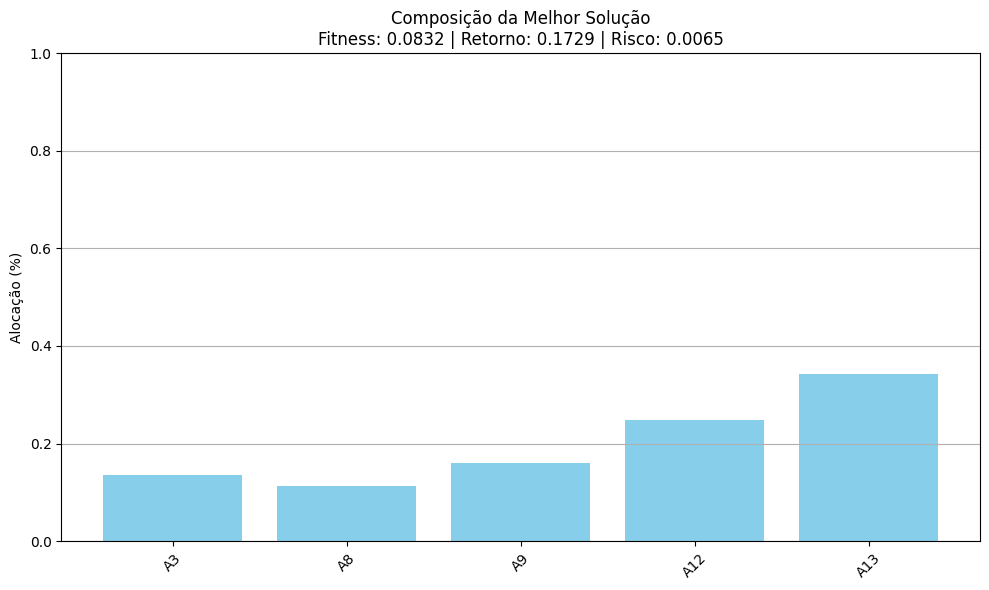

,Ativo,Alocacao,Retorno_Ativo,Variancia_Ativo
0,A3,0.135737,0.1598,0.035210
1,A8,0.112436,0.1799,0.064653
2,A9,0.160821,0.1402,0.077131
3,A12,0.248269,0.1955,0.022849
4,A13,0.342736,0.1749,0.014284


In [4]:
# Usar a melhor solução para validar e plotar sua composição
melhor_solucao, melhor_fit = top3[0]

# Informações por ativo
ativos_selecionados = np.flatnonzero(melhor_solucao)
alocacoes = melhor_solucao[ativos_selecionados]
retornos = returns[ativos_selecionados]
variancias = variances[ativos_selecionados]

# Cálculo do retorno e risco da carteira
retorno_portfolio = np.dot(melhor_solucao, returns)
risco_portfolio = np.sum((melhor_solucao ** 2) * variances)

# Criar DataFrame para visualização
df_melhor = pd.DataFrame({
    "Ativo": ativos_df["Ativo"].iloc[ativos_selecionados].values,
    "Alocacao": alocacoes,
    "Retorno_Ativo": retornos,
    "Variancia_Ativo": variancias
})

# Plotar barras de alocação
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_melhor["Ativo"], df_melhor["Alocacao"], color="skyblue")
ax.set_title(f"Composição da Melhor Solução\nFitness: {melhor_fit:.4f} | Retorno: {retorno_portfolio:.4f} | Risco: {risco_portfolio:.4f}")
ax.set_ylabel("Alocação (%)")
ax.set_ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

df_melhor
